<a href="https://colab.research.google.com/github/pinei/ciencia-dados-python/blob/main/imersao-dados/4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Amostra de dados do ENEM (dados originais disponiveis em http://portal.inep.gov.br/microdados)
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados_df = pd.read_csv(fonte)  # type: <class 'pandas.core.frame.DataFrame'>

# Ciências da Natureza, Ciências Humanas, Matemática, Linguagens e Codigos, Redação
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

In [2]:
dados_notas_df = dados_df[provas].dropna() # Retira os valores NaN

# Variáveis de entrada e saída para o Machine Learning
provas_entrada = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"

notas_entrada = dados_notas_df[provas_entrada]
notas_saida = dados_notas_df[provas_saida]

In [6]:
# Uso da biblioteca SciKitLearn
from sklearn.model_selection import train_test_split

RANDOM_SEED = 871291543

x = notas_entrada
y = notas_saida

# Separando os dados de Teste (25%) e Treino (75%)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=RANDOM_SEED)

print("Shapes:")
print(f"x_treino: {x_treino.shape}")
print(f"x_teste: {x_teste.shape}")
print(f"y_treino: {y_treino.shape}")
print(f"y_teste: {y_teste.shape}")


Shapes:
x_treino: (69404, 4)
x_teste: (23135, 4)
y_treino: (69404,)
y_teste: (23135,)


In [7]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=RANDOM_SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=871291543, tol=0.0001, verbose=0)

- Predição das Notas de Matemática a partir das outras 4 notas
- Comparação com as Notas de Matemática reais
- Verificação do erro na predição

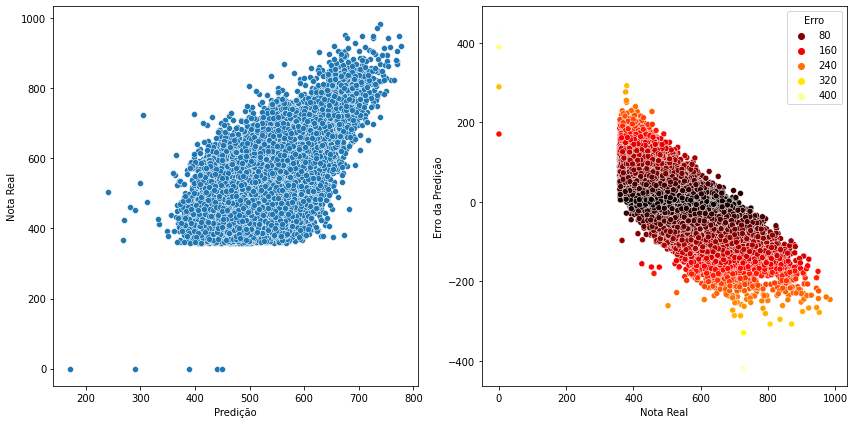

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predição das Notas de Matemática a partir das outras Notas
predicoes_notas_mt = modelo.predict(x_teste)

# Correlação entre as Notas preditas e as Notas reais
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(x=predicoes_notas_mt, y=y_teste)
plt.xlabel('Predição')
plt.ylabel('Nota Real')

# Correlação entre as Notas reais e o erro (diferença) da predição
plt.subplot(122)
sns.scatterplot(x=y_teste, y=(predicoes_notas_mt-y_teste), hue=(predicoes_notas_mt-y_teste).abs(), palette="hot")
plt.xlabel('Nota Real')
plt.ylabel('Erro da Predição')
plt.legend(title="Erro")

plt.tight_layout()

# Verificamos que o modelo erra para mais quando a Nota real é baixa e
# erra para menos quando a Nota real é alta

In [20]:
# Obtendo o desvio padrão do erro na predição da Nota de Matemática
variancia = ( ( y_teste - predicoes_notas_mt ) ** 2 ).mean()
desvio_padrao = variancia ** (1/2)

print(variancia)
print(desvio_padrao)

6104.033715172345
78.12831570674197


In [22]:
# Usando a biblioteca de métricas para obter o mesmo valor 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_teste, predicoes_notas_mt)
print(error)
print(error**(1/2))

6104.033715172319
78.1283157067418


In [23]:
# Usando outro modelo básico de regressão para predição da Nota de Matemática (para comparação)
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
predicoes_notas_mt_dummy = modelo_dummy.predict(x_teste)

error_dummy =  mean_squared_error(y_teste, predicoes_notas_mt_dummy)
print(error_dummy)
print(error_dummy**(1/2))

# O erro acaba ficando bem maior

12079.116010991165
109.90503178194875
